In [87]:
import time
import matplotlib.pyplot as plt

bruteforce = []
backtracking = []
labels = []

def is_valid(board, row, col, num):
    for i in range(len(board)):
        if board[row][i] == num and col != i:
            return False
    for i in range(len(board)):
        if board[i][col] == num and row != i:
            return False

    return True

def draw_board(board):
    if len(board) == 3:
      for i in range(3):
          for j in range(3):
              if j == 2:
                  print(board[i][j])
              else:
                  print(str(board[i][j]) + " ", end="")

    if len(board) == 6:
      for i in range(6):
          if i % 2 == 0 and i != 0:
              print("- - - - - - - - ")

          for j in range(6):
              if j % 3 == 0 and j != 0:
                  print(" | ", end="")

              if j == 5:
                  print(board[i][j])
              else:
                  print(str(board[i][j]) + " ", end="")

    if len(board) == 9:
      for i in range(9):
          if i % 3 == 0 and i != 0:
              print("- - - - - - - - - - - - ")

          for j in range(9):
              if j % 3 == 0 and j != 0:
                  print(" | ", end="")

              if j == 8:
                  print(board[i][j])
              else:
                  print(str(board[i][j]) + " ", end="")


# ====== Brute Force ======

def using_bruteforce(board):
    for row in range(len(board)):
        for col in range(len(board)):
            if board[row][col] == 0:
                for num in range(1, len(board)+1):
                    if is_valid(board, row, col, num):
                        board[row][col] = num

                        if is_valid(board, row, col, num):
                            board[row][col] = 0
                            board[row][col] = num

                            if using_bruteforce(board):
                                return True
                            board[row][col] = 0
                            board[row][col] = num
                        board[row][col] = 0
                return False
    return True


# ===== End Brute Force =====

# ======= Backtraking =======

def using_backtracking(board):
    find = find_empty(board)

    if not find:
        return True

    row, col = find

    for num in range(1, len(board)+1):
        if is_valid(board, row, col, num):
            board[row][col] = num

            if using_backtracking(board):
                return True

            board[row][col] = 0

    return False

def find_empty(board):
    for i in range(len(board)):
        for j in range(len(board)):
            if board[i][j] == 0:
                return (i, j)
    return None



# ======= End Backtraking =======

def preview_with_board(board, name, labels, bruteforce, backtracking):
    print(f'\n=============================== Sudoku {name} ===============================\n')

    name = 'Sudoku ' + name
    labels.append(name)

    print('Before :')
    draw_board(board)

    # Brute Force Testing
    start_bf = time.time()

    if using_bruteforce(board):
        print('\nBrute Force  : Solved')
    else:
        print('\nBrute Force  : Unsolved')

    end_bf = time.time()
    elapsed_bf = (end_bf - start_bf) * 1000

    bruteforce.append(elapsed_bf)
    print('Time Running : ', elapsed_bf)
    # End Brute Force Testing

    # Backtracking Testing
    start_bt = time.time()

    if using_backtracking(board):
        print("\nBacktracking : Solved")
    else:
        print("\nBacktracking : Unsolved")

    end_bt = time.time()
    elapsed_bt = (end_bt - start_bt) * 1000

    backtracking.append(elapsed_bt)
    print('Time Running : ', elapsed_bt)
    # End Backtracking Testing

    print('\n\nAfter :')
    draw_board(board)

    print('\n==========================================================================\n')

def preview_without_board(board, name, labels, bruteforce, backtracking):
    print(f'\n=============================== {name} ===============================\n')

    labels.append(name)

    # Brute Force Testing
    start_bf = time.time()

    if using_bruteforce(board):
        print('\nBrute Force  : Solved')
    else:
        print('\nBrute Force  : Unsolved')

    end_bf = time.time()
    elapsed_bf = (end_bf - start_bf) * 1000

    bruteforce.append(elapsed_bf)
    print('Time Running : ', elapsed_bf)
    # End Brute Force Testing

    # Backtracking Testing
    start_bt = time.time()

    if using_backtracking(board):
        print("\nBacktracking : Solved")
    else:
        print("\nBacktracking : Unsolved")

    end_bt = time.time()
    elapsed_bt = (end_bt - start_bt) * 1000

    backtracking.append(elapsed_bt)
    print('Time Running : ', elapsed_bt)
    # End Backtracking Testing

    print('\n==========================================================================\n')

def show_chart(labels, bruteforce, backtracking):
  plt.figure(figsize=(15, 8))

  plt.plot(labels, backtracking, marker='o', linestyle='-', color='b', label='Backtracking')
  plt.plot(labels, bruteforce, marker='o', linestyle='-', color='r', label='Brute Force')

  for i, label in enumerate(labels):
      plt.annotate(f'{backtracking[i]:.5f}', (label, backtracking[i]), textcoords="offset points", xytext=(0,10), ha='center')
      plt.annotate(f'{bruteforce[i]:.5f}', (label, bruteforce[i]), textcoords="offset points", xytext=(0,10), ha='center')

  plt.ylabel('Time (miliseconds)')
  plt.title('Execution Time Comparison')
  plt.legend()
  plt.grid(True)

  plt.show()

def show_plot_bruteforce(data):
  x_labels = []

  for i in range(len(data)):
      x_labels.append(f'Run {i+1}')

  plt.figure(figsize=(15, 6))

  plt.plot(x_labels, data, marker='o', linestyle='-', color='b', label='Brute Force')

  for i, label in enumerate(x_labels):
      plt.annotate(f'{data[i]:.5f}', (label, data[i]), textcoords="offset points", xytext=(0,20), ha='center')

  plt.title('Bruteforce Execution Time Over Multiple Runs')
  plt.ylabel('Execution Time (seconds)')

  plt.grid(True)
  plt.show()

def show_plot_backtracking(data):
  x_labels = []

  for i in range(len(data)):
      x_labels.append(f'Run {i+1}')

  plt.figure(figsize=(15, 6))

  plt.plot(x_labels, data, marker='o', linestyle='-', color='r', label='Backtracking')

  for i, label in enumerate(x_labels):
      plt.annotate(f'{data[i]:.5f}', (label, data[i]), textcoords="offset points", xytext=(0,20), ha='center')

  plt.title('Backtracking Execution Time Over Multiple Runs')
  plt.ylabel('Execution Time (seconds)')

  plt.grid(True)
  plt.show()

In [88]:
# ======= Execution Time Comparison 3x3, 6x6, 9x9 =======

board3x3 = [
  [1, 0, 0],
  [0, 2, 0],
  [0, 0, 3]
]

board6x6 = [
  [6, 2, 0, 5, 0, 3],
  [0, 0, 0, 0, 0, 0],
  [5, 0, 0, 0, 3, 0],
  [0, 6, 0, 0, 2, 0],
  [0, 0, 0, 3, 4, 6],
  [0, 0, 6, 0, 0, 0]
]

board9x9 = [
  [5, 3, 0, 0, 7, 0, 0, 0, 0],
  [6, 0, 0, 1, 9, 5, 0, 0, 0],
  [0, 9, 8, 0, 0, 0, 0, 6, 0],
  [8, 0, 0, 0, 6, 0, 0, 0, 3],
  [4, 0, 0, 8, 0, 3, 0, 0, 1],
  [7, 0, 0, 0, 2, 0, 0, 0, 6],
  [0, 6, 0, 0, 0, 0, 2, 8, 0],
  [0, 0, 0, 4, 1, 9, 0, 0, 5],
  [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

bruteforce.clear()
backtracking.clear()
backtracking.clear()

preview_with_board(board3x3, '3x3', labels, bruteforce, backtracking)
preview_with_board(board6x6, '6x6', labels, bruteforce, backtracking)
preview_with_board(board9x9, '9x9', labels, bruteforce, backtracking)


=============================== Sudoku 3x3 ===============================

Before :
1 0 0
0 2 0
0 0 3

Brute Force  : Solved
Time Running :  0.06961822509765625

Backtracking : Solved
Time Running :  0.027894973754882812


After :
1 3 2
3 2 1
2 1 3



=============================== Sudoku 6x6 ===============================

Before :
6 2 0  | 5 0 3
0 0 0  | 0 0 0
- - - - - - - - 
5 0 0  | 0 3 0
0 6 0  | 0 2 0
- - - - - - - - 
0 0 0  | 3 4 6
0 0 6  | 0 0 0

Brute Force  : Solved
Time Running :  0.8141994476318359

Backtracking : Solved
Time Running :  0.030279159545898438


After :
6 2 4  | 5 1 3
1 3 5  | 2 6 4
- - - - - - - - 
5 4 2  | 6 3 1
4 6 3  | 1 2 5
- - - - - - - - 
2 5 1  | 3 4 6
3 1 6  | 4 5 2



=============================== Sudoku 9x9 ===============================

Before :
5 3 0  | 0 7 0  | 0 0 0
6 0 0  | 1 9 5  | 0 0 0
0 9 8  | 0 0 0  | 0 6 0
- - - - - - - - - - - - 
8 0 0  | 0 6 0  | 0 0 3
4 0 0  | 8 0 3  | 0 0 1
7 0 0  | 0 2 0  | 0 0 6
- - - - - - - - - - - - 
0 6

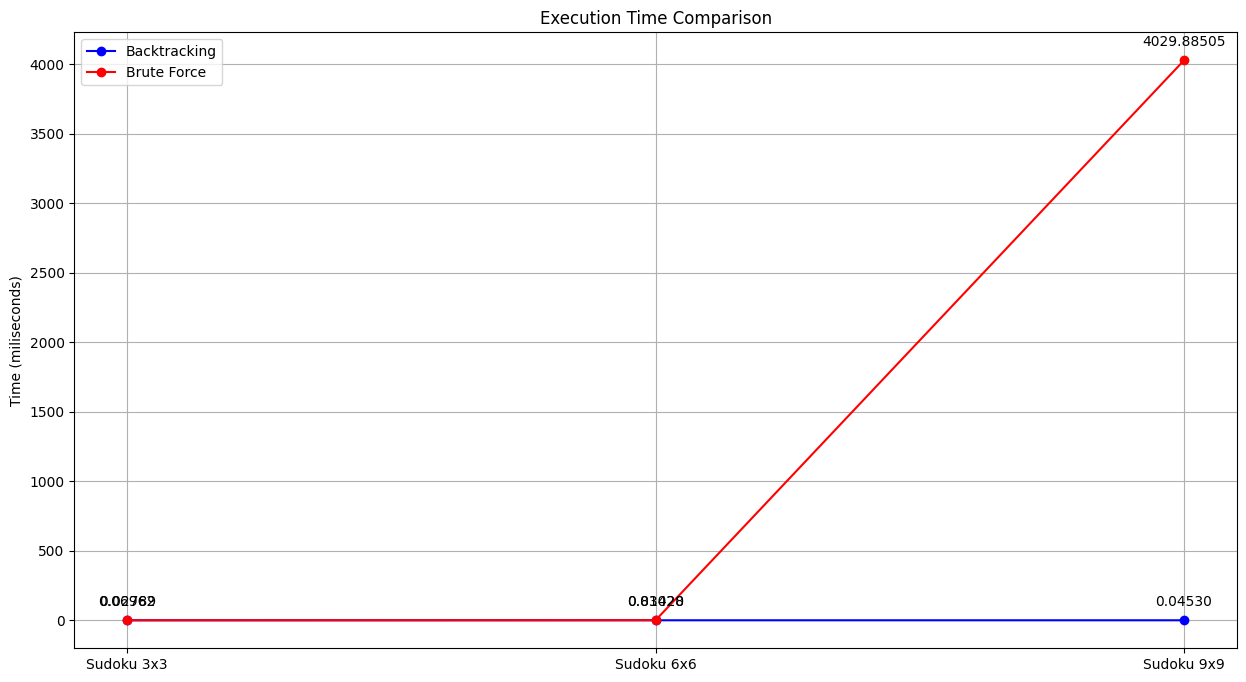

In [89]:
show_chart(labels, bruteforce, backtracking)

In [90]:
# ======= Testing Board 3x3 =======

board1 = [
    [3, 0, 0],
    [0, 0, 2],
    [0, 1, 0]
]

board2 = [
    [0, 0, 1],
    [2, 0, 0],
    [0, 3, 0]
]

board3 = [
    [0, 2, 0],
    [0, 0, 0],
    [3, 0, 1]
]

board4 = [
    [1, 0, 0],
    [0, 3, 0],
    [0, 0, 2]
]

board5 = [
    [0, 1, 0],
    [3, 0, 0],
    [0, 0, 2]
]

board6 = [
    [0, 0, 3],
    [1, 0, 0],
    [0, 2, 0]
]

board7 = [
    [0, 0, 0],
    [0, 2, 1],
    [3, 0, 0]
]

board8 = [
    [2, 0, 0],
    [0, 0, 3],
    [0, 1, 0]
]

board9 = [
    [0, 3, 0],
    [2, 0, 0],
    [0, 0, 1]
]

board10 = [
    [0, 2, 0],
    [0, 0, 1],
    [3, 0, 0]
]

bruteforce.clear()
backtracking.clear()

preview_without_board(board1, 'Board 1', labels, bruteforce, backtracking)
preview_without_board(board2, 'Board 2', labels, bruteforce, backtracking)
preview_without_board(board3, 'Board 3', labels, bruteforce, backtracking)
preview_without_board(board4, 'Board 4', labels, bruteforce, backtracking)
preview_without_board(board5, 'Board 5', labels, bruteforce, backtracking)
preview_without_board(board6, 'Board 6', labels, bruteforce, backtracking)
preview_without_board(board7, 'Board 7', labels, bruteforce, backtracking)
preview_without_board(board8, 'Board 8', labels, bruteforce, backtracking)
preview_without_board(board9, 'Board 9', labels, bruteforce, backtracking)
preview_without_board(board10, 'Board 10', labels, bruteforce, backtracking)


=============================== Board 1 ===============================


Brute Force  : Solved
Time Running :  1.3852119445800781

Backtracking : Solved
Time Running :  0.3769397735595703



=============================== Board 2 ===============================


Brute Force  : Solved
Time Running :  0.5810260772705078

Backtracking : Solved
Time Running :  0.0247955322265625



=============================== Board 3 ===============================


Brute Force  : Unsolved
Time Running :  0.0743865966796875

Backtracking : Unsolved
Time Running :  0.058650970458984375



=============================== Board 4 ===============================


Brute Force  : Solved
Time Running :  0.1049041748046875

Backtracking : Solved
Time Running :  0.017642974853515625



=============================== Board 5 ===============================


Brute Force  : Solved
Time Running :  0.0667572021484375

Backtracking : Solved
Time Running :  0.01811981201171875



==============================

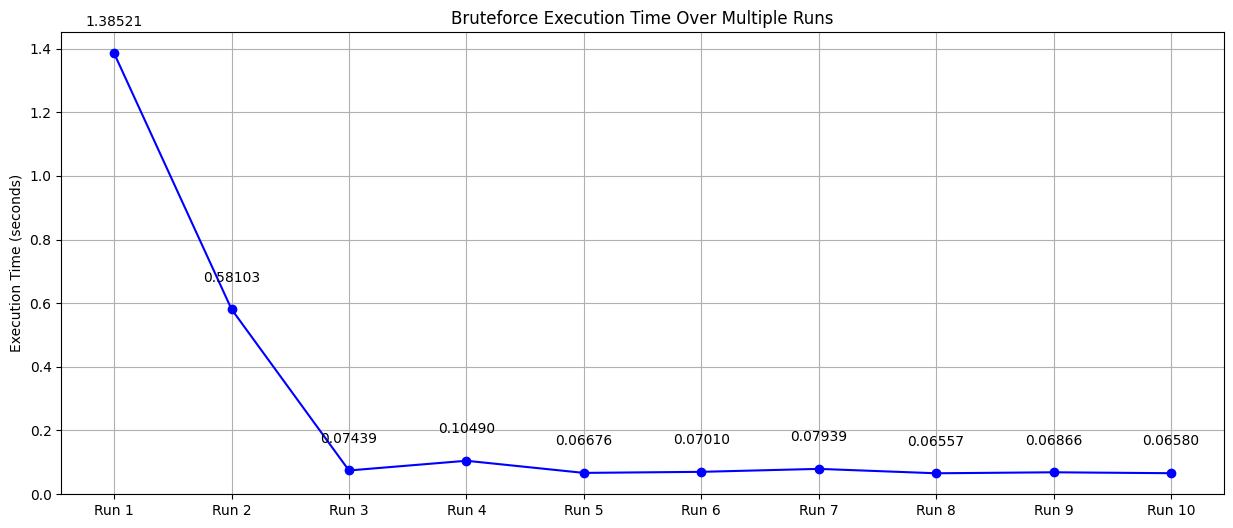

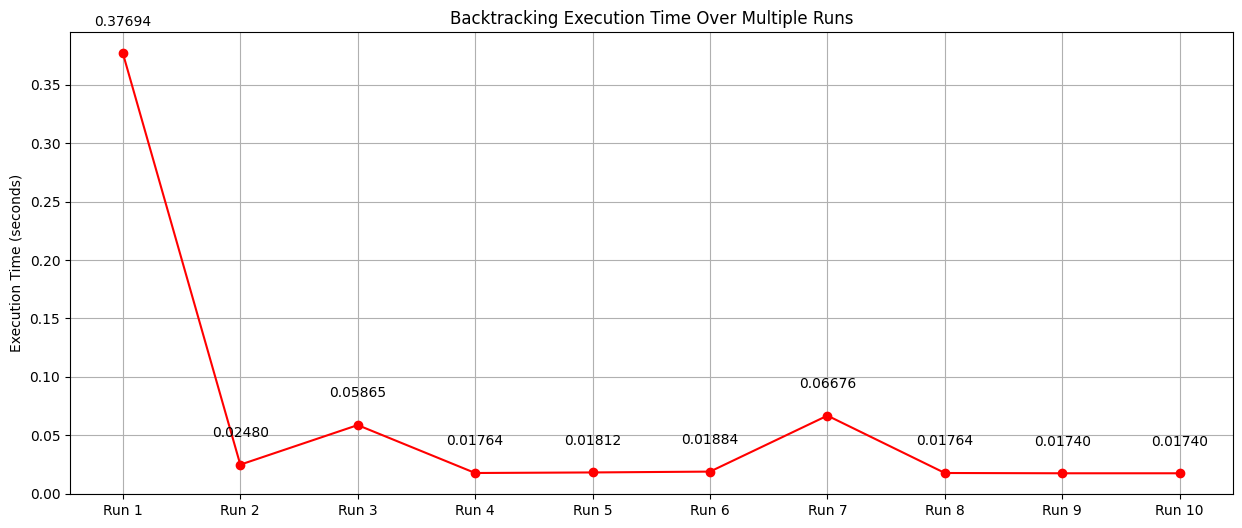

In [91]:
# ======= Chart 3x3 =======

show_plot_bruteforce(bruteforce)

print()
print()

show_plot_backtracking(backtracking)

In [110]:
# ======= Testing Board 6x6 =======

board1 = [
    [6, 2, 0, 5, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 3, 4, 6],
    [0, 0, 6, 0, 0, 0]
]

board2 = [
    [6, 2, 0, 5, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 3, 4, 0],
    [1, 0, 0, 0, 0, 6]
]

board3 = [
    [6, 2, 0, 5, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 0, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 3, 4, 6],
    [0, 0, 6, 0, 0, 0]
]

board4 = [
    [6, 2, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 3, 4, 6],
    [0, 0, 6, 0, 0, 0]
]

board5 = [
    [6, 2, 0, 5, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 3, 0, 6],
    [0, 0, 6, 0, 4, 0]
]

board6 = [
    [6, 2, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 3, 4, 0],
    [0, 0, 0, 0, 0, 6]
]

board7 = [
    [6, 2, 0, 5, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 3, 4, 6],
    [0, 0, 6, 0, 0, 3]
]

board8 = [
    [6, 2, 0, 5, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 0, 0],
    [0, 0, 0, 3, 4, 6],
    [0, 0, 6, 0, 0, 0]
]

board9 = [
    [6, 0, 0, 5, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 3, 4, 6],
    [0, 0, 6, 0, 0, 0]
]

board10 = [
    [6, 2, 0, 5, 0, 3],
    [0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0],
    [0, 6, 0, 0, 2, 0],
    [0, 0, 0, 0, 4, 6],
    [0, 0, 6, 0, 0, 0]
]

bruteforce.clear()
backtracking.clear()

preview_without_board(board1, 'Board 1', labels, bruteforce, backtracking)
preview_without_board(board2, 'Board 2', labels, bruteforce, backtracking)
preview_without_board(board3, 'Board 3', labels, bruteforce, backtracking)
preview_without_board(board4, 'Board 4', labels, bruteforce, backtracking)
preview_without_board(board5, 'Board 5', labels, bruteforce, backtracking)
preview_without_board(board6, 'Board 6', labels, bruteforce, backtracking)
preview_without_board(board7, 'Board 7', labels, bruteforce, backtracking)
preview_without_board(board8, 'Board 8', labels, bruteforce, backtracking)
preview_without_board(board9, 'Board 9', labels, bruteforce, backtracking)
preview_without_board(board10, 'Board 10', labels, bruteforce, backtracking)


=============================== Board 1 ===============================


Brute Force  : Solved
Time Running :  0.8609294891357422

Backtracking : Solved
Time Running :  0.03457069396972656



=============================== Board 2 ===============================


Brute Force  : Solved
Time Running :  10.051250457763672

Backtracking : Solved
Time Running :  0.499725341796875



=============================== Board 3 ===============================


Brute Force  : Solved
Time Running :  2.6564598083496094

Backtracking : Solved
Time Running :  0.049591064453125



=============================== Board 4 ===============================


Brute Force  : Solved
Time Running :  6.350040435791016

Backtracking : Solved
Time Running :  0.05173683166503906



=============================== Board 5 ===============================


Brute Force  : Solved
Time Running :  0.9872913360595703

Backtracking : Solved
Time Running :  0.03457069396972656



=============================== Board 6

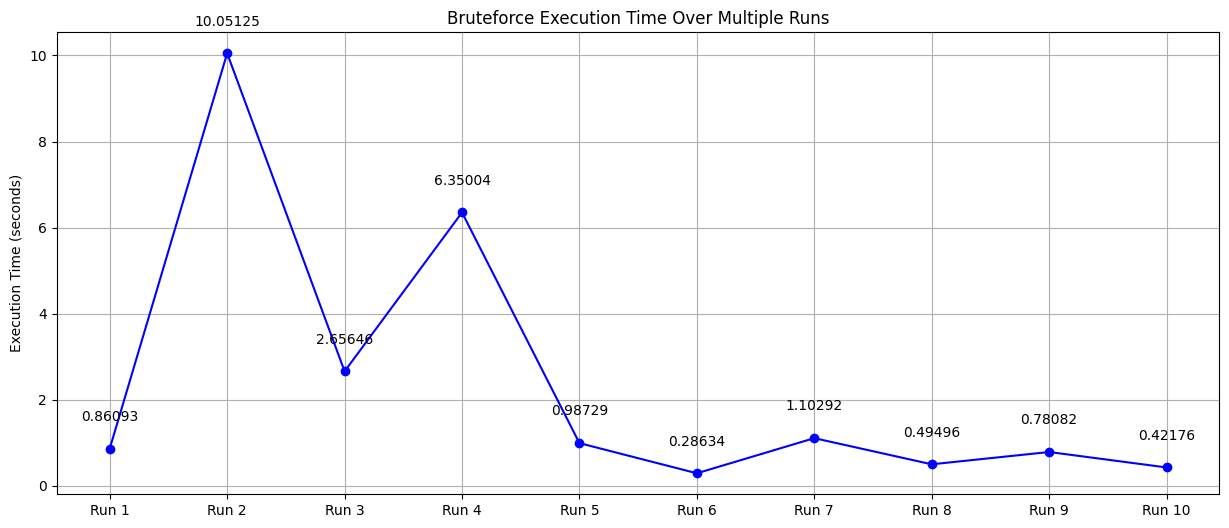

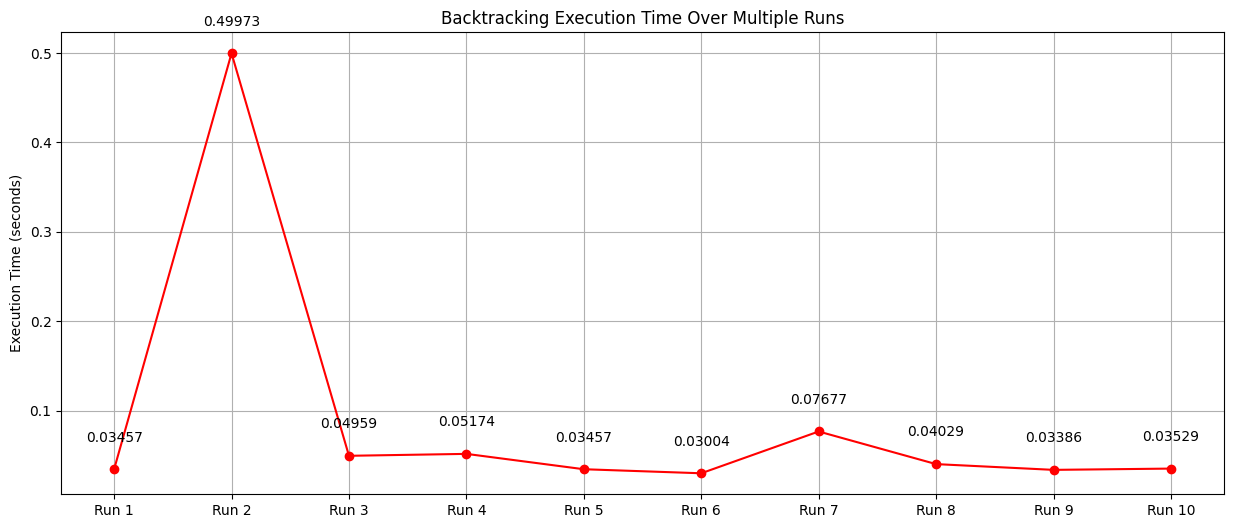

In [111]:
# ======= Chart 6x6 =======

show_plot_bruteforce(bruteforce)

print()
print()

show_plot_backtracking(backtracking)

In [106]:
# ======= Testing Board 9x9 =======

board1 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

board2 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 0, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

board3 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 0, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

board4 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 0, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

board5 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 0],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

board6 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 0, 0, 0, 7, 9]
]

board7 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 0]
]

board8 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 0]
]

board9 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 0, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 0, 9]
]

board10 = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 0],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

bruteforce.clear()
backtracking.clear()

preview_without_board(board1, 'Board 1', labels, bruteforce, backtracking)
preview_without_board(board2, 'Board 2', labels, bruteforce, backtracking)
preview_without_board(board3, 'Board 3', labels, bruteforce, backtracking)
preview_without_board(board4, 'Board 4', labels, bruteforce, backtracking)
preview_without_board(board5, 'Board 5', labels, bruteforce, backtracking)
preview_without_board(board6, 'Board 6', labels, bruteforce, backtracking)
preview_without_board(board7, 'Board 7', labels, bruteforce, backtracking)
preview_without_board(board8, 'Board 8', labels, bruteforce, backtracking)
preview_without_board(board9, 'Board 9', labels, bruteforce, backtracking)
preview_without_board(board10, 'Board 10', labels, bruteforce, backtracking)


=============================== Board 1 ===============================


Brute Force  : Solved
Time Running :  3990.499258041382

Backtracking : Solved
Time Running :  0.04649162292480469



=============================== Board 2 ===============================


Brute Force  : Solved
Time Running :  13410.883665084839

Backtracking : Solved
Time Running :  0.04458427429199219



=============================== Board 3 ===============================


Brute Force  : Solved
Time Running :  7781.075477600098

Backtracking : Solved
Time Running :  0.04315376281738281



=============================== Board 4 ===============================


Brute Force  : Solved
Time Running :  8307.807207107544

Backtracking : Solved
Time Running :  0.041484832763671875



=============================== Board 5 ===============================


Brute Force  : Solved
Time Running :  7518.225431442261

Backtracking : Solved
Time Running :  0.04649162292480469



=============================== Board

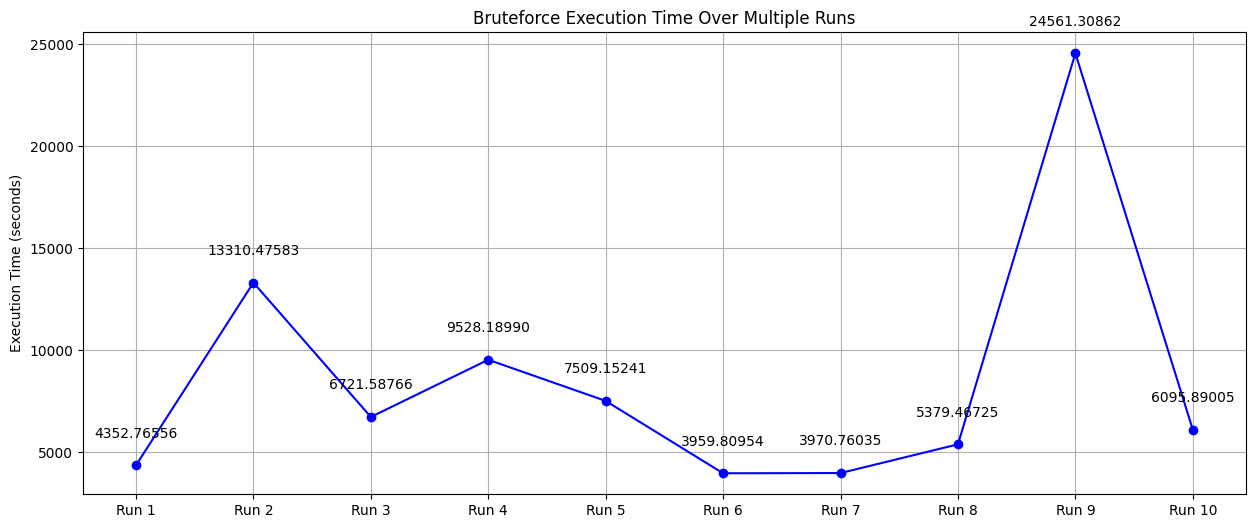

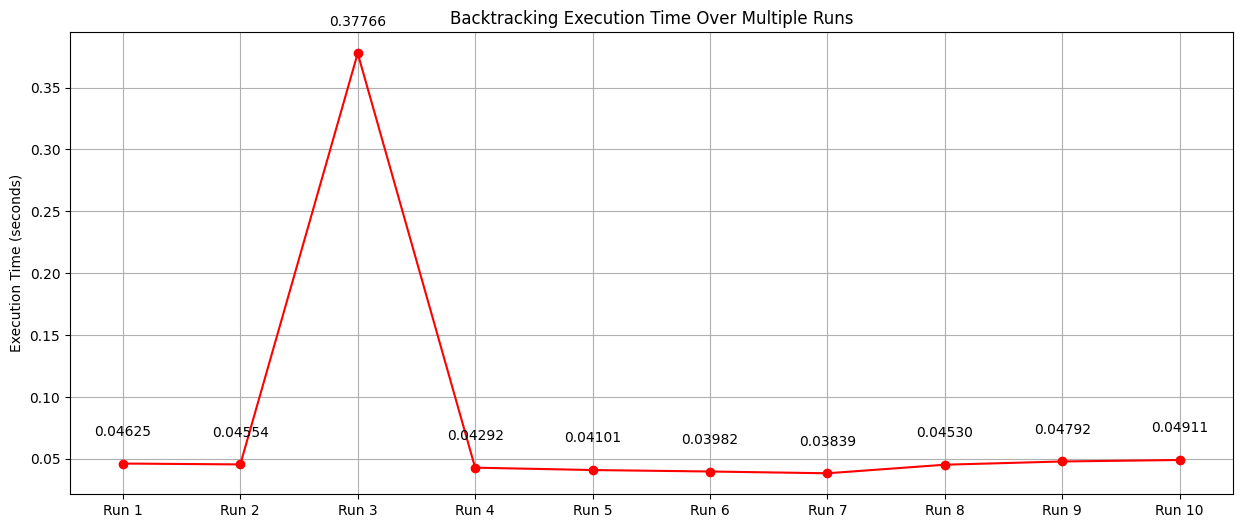

In [105]:
# ======= Chart 9x9 =======

show_plot_bruteforce(bruteforce)

print()
print()

show_plot_backtracking(backtracking)